In [64]:
from autenticazione.autenticazione import start_kaggle
start_kaggle()


In [65]:
# Secondo passo: Download del dataset
# Visualizzare la lista dei dataset
import kaggle

key_search = input("Inserisci la chiave di ricerca: ")
datasets = kaggle.api.datasets_list(search=key_search)

In [66]:
# stampo la lista dei dataset
# la lista di dataset è una lista di dizionari, il cui valore di owner e' contenuto nella key 'ref'
i = 0
lista = []
for dataset in datasets:
    print('Dataset n: ', i, dataset['ref'])
    lista.append(dataset['ref'])
    i += 1

Dataset n:  0 nehalbirla/vehicle-dataset-from-cardekho
Dataset n:  1 dataturks/vehicle-number-plate-detection
Dataset n:  2 brsdincer/vehicle-detection-image-set
Dataset n:  3 debajyotipodder/co2-emission-by-vehicles
Dataset n:  4 shivamb/vehicle-claim-fraud-detection
Dataset n:  5 geoffnel/evs-one-electric-vehicle-dataset
Dataset n:  6 lasaljaywardena/vehicle-images-dataset
Dataset n:  7 mathurinache/invehicle-coupon-recommendation
Dataset n:  8 lasaljaywardena/sri-lanka-vehicle-prices-dataset
Dataset n:  9 tsiaras/uk-road-safety-accidents-and-vehicles
Dataset n:  10 vishnu0399/emergency-vehicle-siren-sounds
Dataset n:  11 mamtadhaker/lt-vehicle-loan-default-prediction
Dataset n:  12 new-york-city/nypd-motor-vehicle-collisions
Dataset n:  13 epa/fuel-economy
Dataset n:  14 utkarshx27/electric-vehicle-population-data
Dataset n:  15 utkarshx27/motor-vehicle-collisions
Dataset n:  16 nypd/vehicle-collisions
Dataset n:  17 anmolkumar/health-insurance-cross-sell-prediction
Dataset n:  18 m

In [ ]:
# scelgo il dataset che mi interessa e lo scarico
# imposto il path in cui scaricare il dataset
# path = os.path.dirname(os.path.abspath(__file__)) + '/dataset' su juptyer notebook non funziona
# usare invece sys.path[0] + '/dataset' con la libreria sys
import sys
path = sys.path[0] + '/dataset'

# scelgo il dataset che mi interessa
dt_scelto = int(input("Inserisci il numero del dataset che ti interessa: "))

# scarico il dataset
kaggle.api.dataset_download_files(lista[dt_scelto], path=path, unzip=True)

In [46]:
# ispeziono il dataset
# creo un dataframe con il dataset
import pandas as pd
name_csv = 'stolenvehicles.csv'
df = pd.read_csv(path + '/' + name_csv)

FACCIAMO UN PO DI ANALISI DEL DATASET

In [ ]:
# esploriamo il dataframe per capire come è fatto
df.head()

In [ ]:
df.info()

In [ ]:
# veidamo se ci sono valori nulli
df.isnull().sum()

In [51]:
# puliamo il dataset eliminando le righe con i valori nulli
df = df.dropna()

In [52]:
df[df['ModelYear'] == 0]

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location


In [ ]:
# facciamo un po si analisi statisticasulle colonne 
# contiamo quante auto sono state rubate in base al colore
df['Color'].value_counts()

In [ ]:
# contiamo quante auto sono state rubate in base al tipo di veicolo
df['VehicleType'].value_counts()

In [ ]:
# contiamo quante auto sono state rubate in base al tipo di veicolo e al colore
df.groupby(['Color', 'VehicleType']).size()

In [ ]:
# contiamo quante auto sono state rubate in base all'anno di fabbricazione
df['ModelYear'].value_counts()

In [ ]:
# calcoliamo la probabilità che un'auto sia stata rubata in base al colore
df['Color'].value_counts(normalize=True)

In [ ]:
# calcoliamo la probabilità che un'auto sia stata rubata in base al tipo di veicolo e al colore
df1 = df.groupby(['Color', 'VehicleType']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

df1.to_csv('probabilita.csv')

In [26]:
# determiniamo quale colore è più probabile che sia stato rubato in base al tipo di veicolo e al colore
df1.idxmax()

('Pink', 'Hatchback')

In [32]:
# raggruppiamo le auto rubate in base al luoogo in cui sono state rubate
df.groupby(['Location', 'Color', 'ModelYear']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

Location       Color   ModelYear
Auckland City  Black   1989         0.158479
                       1992         0.158479
                       1996         0.158479
                       1997         0.475436
                       1999         0.158479
                                      ...   
Wellington     Yellow  2002         0.239808
                       2006         0.239808
                       2007         0.239808
                       2009         0.239808
                       2014         0.239808
Length: 1916, dtype: float64

In [33]:
# visualizziamo un po di grafici
import matplotlib.pyplot as plt
import seaborn as sns

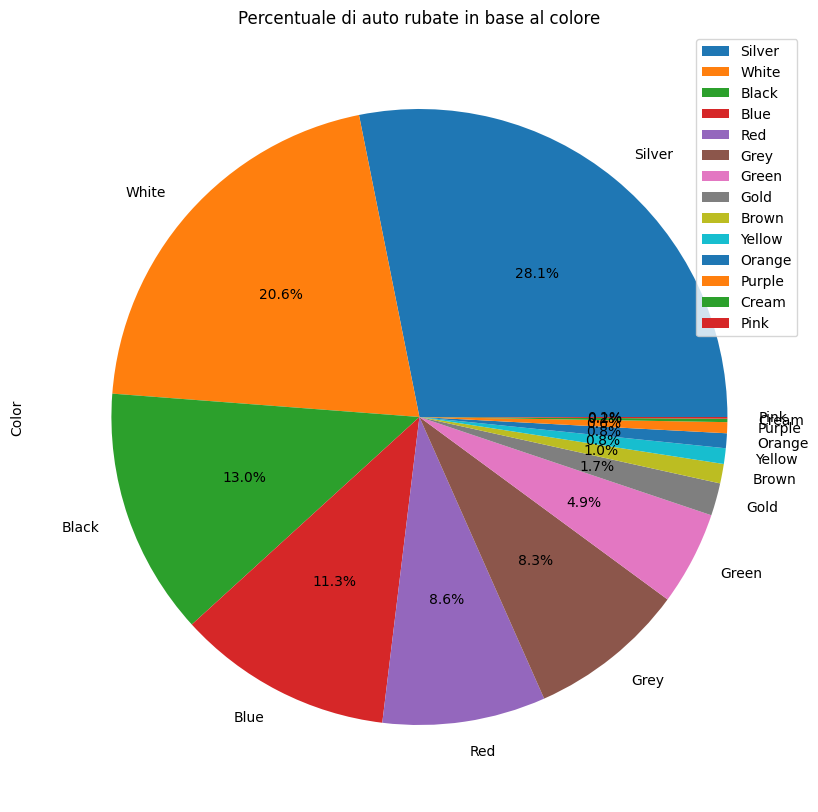

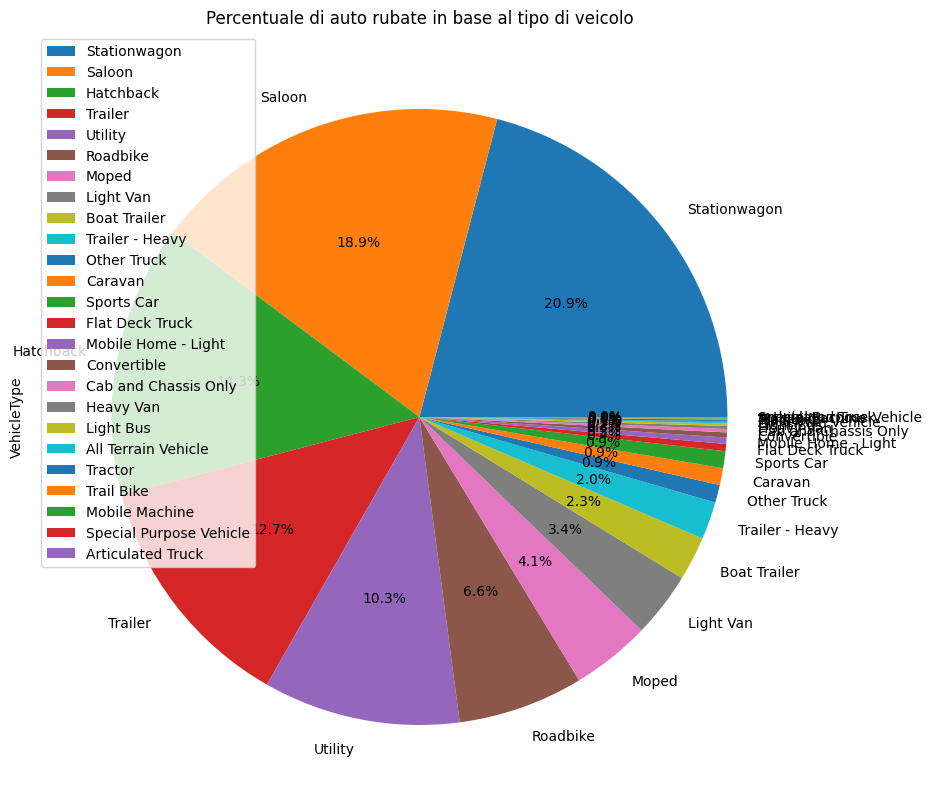

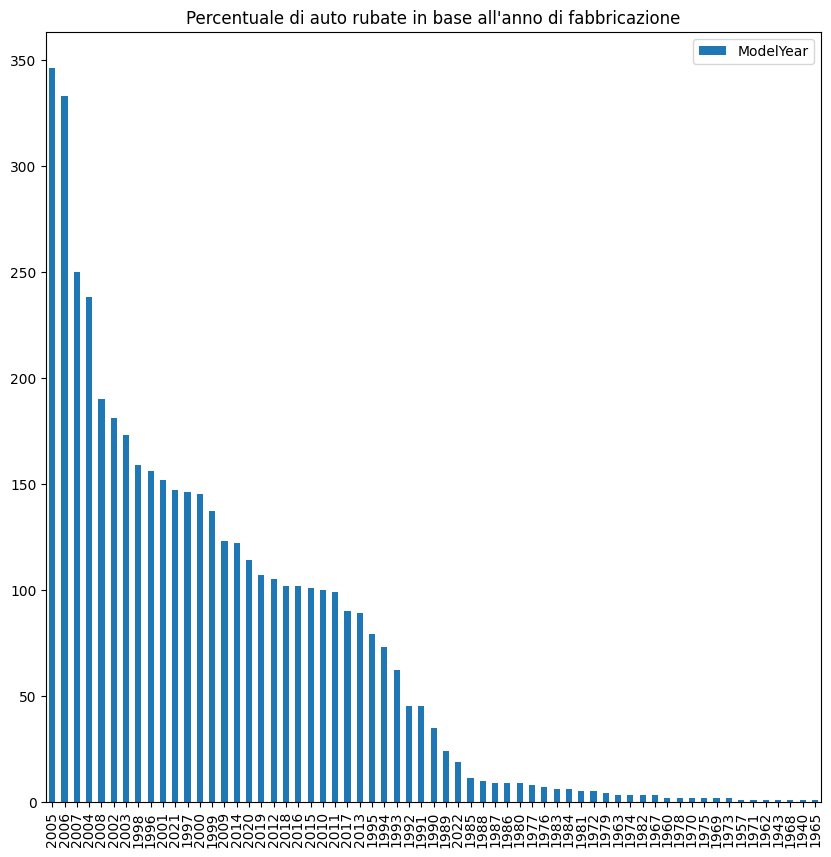

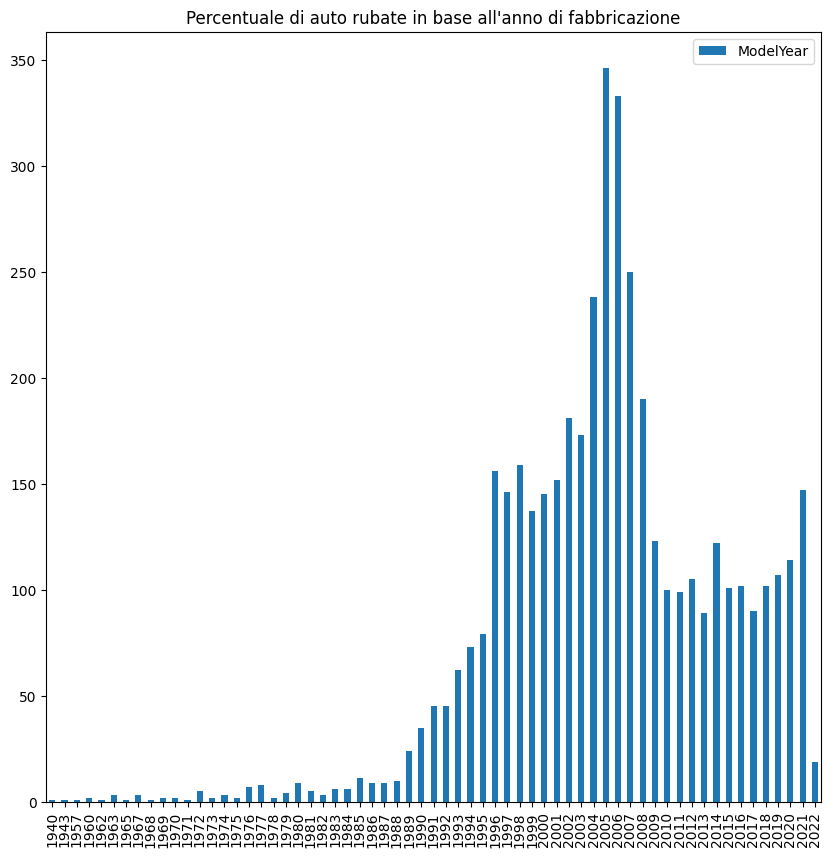

In [38]:
# grafico a torta che mostra la percentuale di auto rubate in base al colore
df['Color'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10))
plt.title('Percentuale di auto rubate in base al colore')
plt.legend()
plt.show()

# grafico a torta che mostra la percentuale di auto rubate in base al tipo di veicolo
df['VehicleType'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10))
plt.title('Percentuale di auto rubate in base al tipo di veicolo')
plt.legend()
plt.show()

# istogramma che mostra la percentuale di auto rubate in base all'anno di fabbricazione
df['ModelYear'].value_counts().plot(kind='bar', figsize=(10, 10))
plt.title('Percentuale di auto rubate in base all\'anno di fabbricazione')
plt.legend()
plt.show()

# istogramma che mostra la percentuale di auto rubate in base all´anno di fabbricazione con asse x ordinato
df['ModelYear'].value_counts().sort_index().plot(kind='bar', figsize=(10, 10))
plt.title('Percentuale di auto rubate in base all\'anno di fabbricazione')
plt.legend()

In [61]:
# determinare una correlazione tra l'anno di fabbricazione e il numero di auto rubate
# creiamo un dataframe con l'anno di fabbricazione e il numero di auto rubate
df1 = df.groupby(['ModelYear', 'Color']).size().reset_index(name='NumeroAutoRubate')
df1



,ModelYear,Color,NumeroAutoRubate
0,1940,White,1
1,1943,White,1
2,1957,Red,1
3,1960,Grey,1
4,1960,White,1
...,...,...,...
411,2022,Black,7
412,2022,Grey,1
413,2022,Red,3
414,2022,Silver,7


In [62]:
df1.corr()

,ModelYear,NumeroAutoRubate
ModelYear,1.000000,0.283281
NumeroAutoRubate,0.283281,1.000000


<AxesSubplot:xlabel='ModelYear', ylabel='NumeroAutoRubate'>

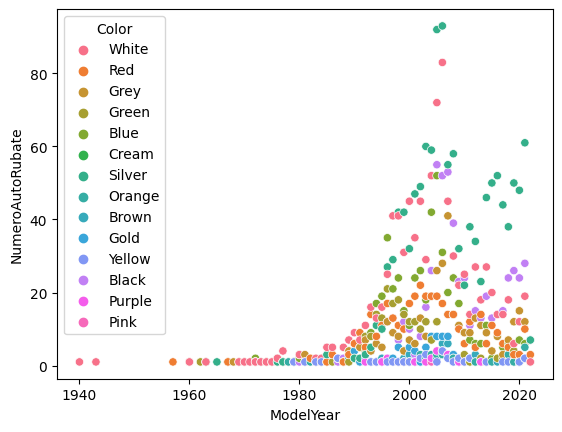

In [63]:
# creiamo un grafico a dispersione che mostra la correlazione tra l'anno di fabbricazione e il numero di auto rubate in base al colore
sns.scatterplot(x='ModelYear', y='NumeroAutoRubate', hue='Color', data=df1)

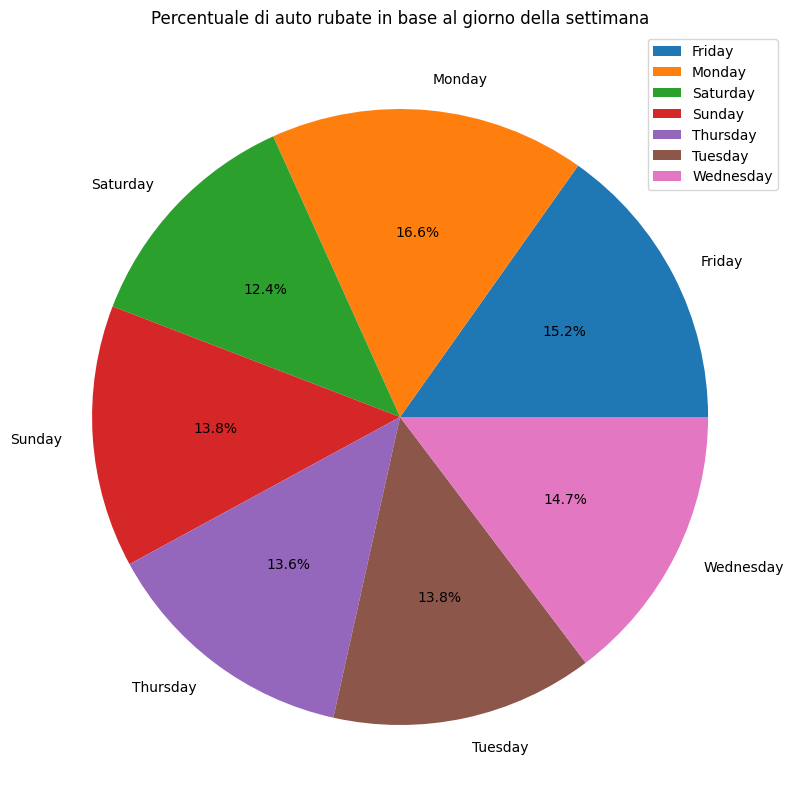

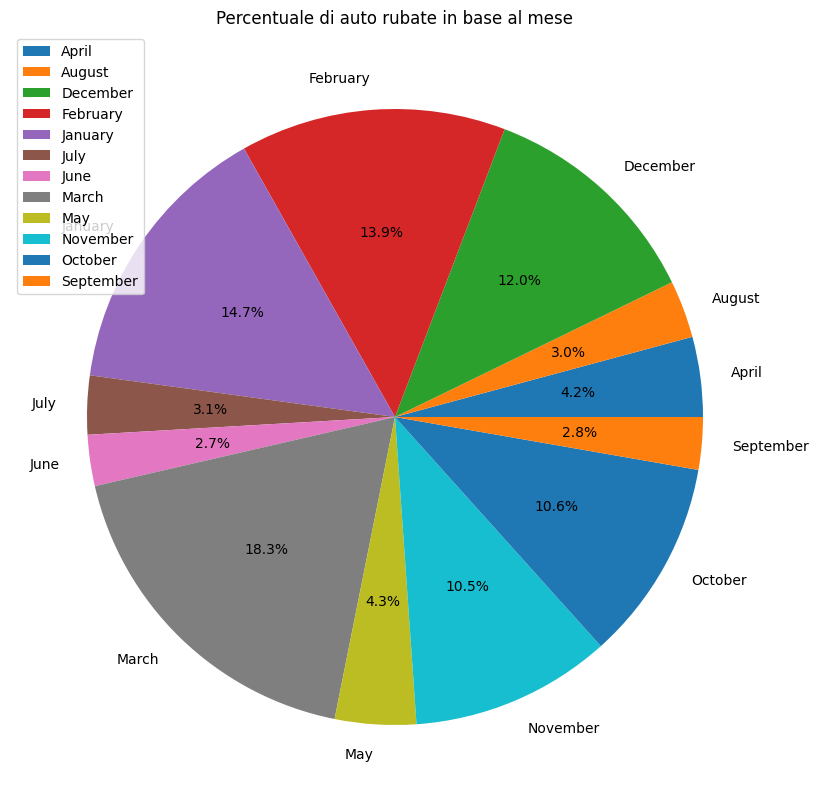

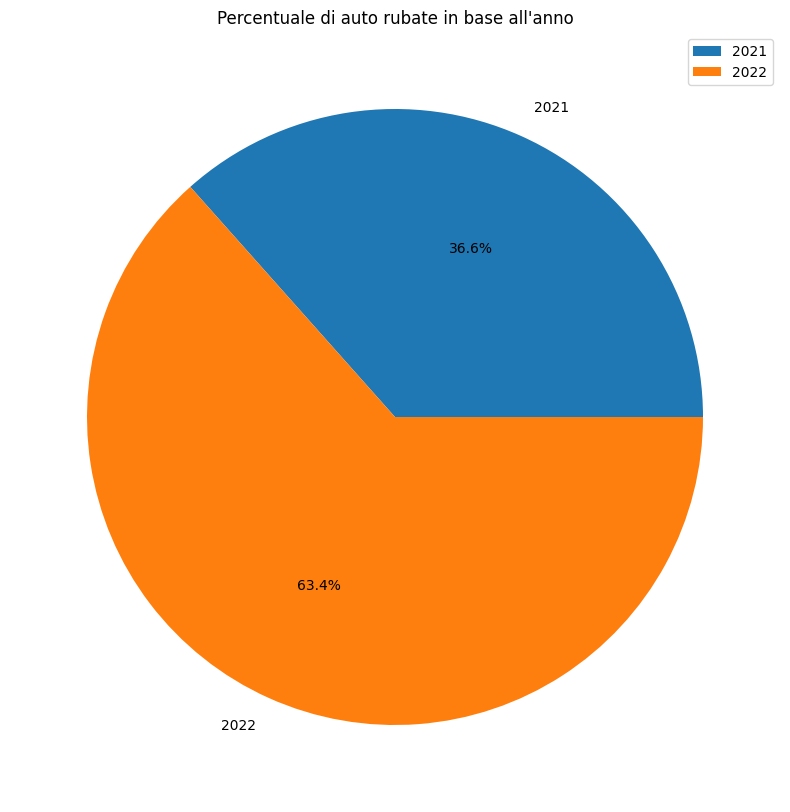

Giorno in cui sono state rubate più auto:  Monday
Mese in cui sono state rubate più auto:  March
Anno in cui sono state rubate più auto:  2022


In [76]:
# convertiamo la colonna 'DateStolen' in formato data
df['DateStolen'] = pd.to_datetime(df['DateStolen'], format='%m/%d/%Y')

# creiamo una colonna con il giorno della settimana in cui è stata rubata l'auto
df['GiornoSettimana'] = df['DateStolen'].dt.day_name()

# creiamo una colonna con il mese in cui è stata rubata l'auto
df['Mese'] = df['DateStolen'].dt.month_name()

# creiamo una colonna con l'anno in cui è stata rubata l'auto
df['Anno'] = df['DateStolen'].dt.year

# creiamo un dataframe la statistica del numero di auto rubate in base al giorno della settimana, al mese e all'anno
df1 = df.groupby(['GiornoSettimana']).size().reset_index(name='NumeroAutoRubate')
df1['NumeroAutoRubate %'] =  df1['NumeroAutoRubate'] / df1['NumeroAutoRubate'].sum() * 100

df2 = df.groupby(['Mese']).size().reset_index(name='NumeroAutoRubate')
df2['NumeroAutoRubate %'] =  df2['NumeroAutoRubate'] / df2['NumeroAutoRubate'].sum() * 100

df3 = df.groupby(['Anno']).size().reset_index(name='NumeroAutoRubate')
df3['NumeroAutoRubate %'] =  df3['NumeroAutoRubate'] / df3['NumeroAutoRubate'].sum() * 100

# creiamo un grafico a torta che mostra la percentuale di auto rubate in base al giorno della settimana
plt.figure(figsize=(10, 10))
plt.pie(df1['NumeroAutoRubate %'], labels=df1['GiornoSettimana'], autopct='%1.1f%%')
plt.title('Percentuale di auto rubate in base al giorno della settimana')
plt.legend()
plt.show()

# creiamo un grafico a torta che mostra la percentuale di auto rubate in base al mese
plt.figure(figsize=(10, 10))
plt.pie(df2['NumeroAutoRubate %'], labels=df2['Mese'], autopct='%1.1f%%')
plt.title('Percentuale di auto rubate in base al mese')
plt.legend()
plt.show()

# creiamo un grafico a torta che mostra la percentuale di auto rubate in base all'anno
plt.figure(figsize=(10, 10))
plt.pie(df3['NumeroAutoRubate %'], labels=df3['Anno'], autopct='%1.1f%%')
plt.title('Percentuale di auto rubate in base all\'anno')
plt.legend()
plt.show()

# printiamo a video il giorno, il mese e l'anno in cui sono state rubate più auto
print('Giorno in cui sono state rubate più auto: ', df1['GiornoSettimana'][df1['NumeroAutoRubate'].idxmax()])
print('Mese in cui sono state rubate più auto: ', df2['Mese'][df2['NumeroAutoRubate'].idxmax()])
print('Anno in cui sono state rubate più auto: ', df3['Anno'][df3['NumeroAutoRubate'].idxmax()])


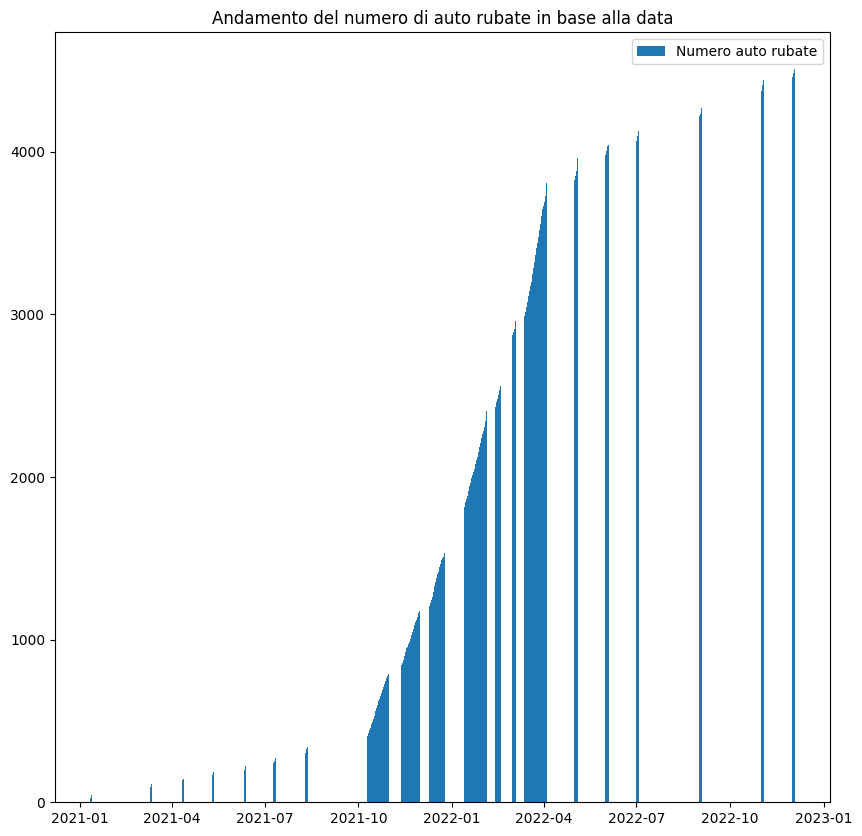

In [85]:
# visualizziamo un grafico con l'andamento del numero di auto rubate in base alla data
df_stolen = df.groupby(['DateStolen']).size().reset_index(name='NumeroAutoRubate')
df_stolen['Comulative'] = df_stolen['NumeroAutoRubate'].cumsum()

# disegnamo un grafico a barre che mostra l'andamento del numero di auto rubate in base alla data
plt.figure(figsize=(10, 10))
plt.bar(df_stolen['DateStolen'], df_stolen['Comulative'], label='Numero auto rubate')
plt.title('Andamento del numero di auto rubate in base alla data')
plt.legend()
plt.show()

